# Bootstrap analysis: LL Inactive interface
Analysis of the TRAM runs on the bootstrap samples for convergence calculation 

## Do analysis

In [1]:
import numpy as np
import pickle
import pyemma
import datetime 
import sys,os,re
import pandas as pd
pyemma.__version__

u'2.2.7'

### Read file list

In [2]:
base_dir = '/sc/orga/scratch/pradad01/TRAM/Inactive/'
dir = base_dir+'Errors/LL/'

## get the list of all MSM models in this folder [fraction]/[sampleID]/MSM.pck
file_list = []
for root,dirs,files in os.walk(dir):
        for f in files:
            subdir=root.replace(dir, '')
            if re.search("MSM.pck$",f):
                name=root+'/'+f
                fraction,replica=re.search("([0-9]+)/([0-9]+)",subdir).group(1,2)
                ## convert fraction and replica to int for proper ordering of the results
                file_list.append((int(fraction),int(replica),name))

df=pd.DataFrame(file_list,columns=['fraction','replica','file'])
#df

### Calculate MFPT from bulk to non-bulk in all models

In [3]:
# add columns to store results
df['mfpt_on_all'] = pd.Series( index=df.index)
df['mfpt_off_all'] = pd.Series( index=df.index)

#### statistics definition
We define a simple statistics to evaluate convergence
1. I use here the MFPT from the bulk to any other state **is this reasonable??**
2. I always ask for 15 macrostates, irrespective of lambdas **is this reasonable??**
2. also note that bulk is identified from largest component. **is this reasonable??**
3. I'm not sure of active set indices below. please check!

In [4]:
def get_simple_statistics(msm):

    # we use 15 PCCA+ clusters as in Analysis_Inactive_LL.ipynb
    pcca=pyemma.msm.PCCA(MSM.P,15)

    ## find which macrostate contains more microstates, we assume this to be the bulk
    #pop_macro=np.array([len(MSM.active_set[micro]) for i,micro in enumerate(pcca.metastable_sets)])
    pop_macro2=np.array([len(micro) for i,micro in enumerate(pcca.metastable_sets)])
    bulk_macro_ID = np.argmax(pop_macro2)
    
    ## be very careful with the active set indices here. DOUBLE CHECK!!
    bulk_microstates = pcca.metastable_sets[bulk_macro_ID]
    # nonbulk is all the rest (I hate python)
    nonbulk_microstates = np.concatenate(pcca.metastable_sets[:bulk_macro_ID] + pcca.metastable_sets[(bulk_macro_ID+1):])
    # start-end order
    #bind_toanything_steps = MSM.mfpt(bulk_microstates, nonbulk_microstates)
    bind_toanything_steps = MSM.mfpt(nonbulk_microstates, bulk_microstates)
    unbind_fromanything_steps = MSM.mfpt(bulk_microstates,nonbulk_microstates)
    
    return bind_toanything_steps, unbind_fromanything_steps


In [5]:
for i,file in enumerate(df['file']):
    print(file)
    MSM= pickle.load(open( file, "rb" ) )
    MFPT_to, MFPT_from =get_simple_statistics(MSM)
    #df['mfpt'][i]=MFPT
    df.loc[i,('mfpt_on_all')]=MFPT_to
    df.loc[i,('mfpt_off_all')]=MFPT_from
        

/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/100/1/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/100/2/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/100/3/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/100/4/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/100/6/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/90/1/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/90/2/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/90/3/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/90/4/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/90/5/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/90/6/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/80/1/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/80/2/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/80/3/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/80/5/MSM.pck
/sc/orga/scratch/pradad01/TRAM/Inactive/Errors/LL/

In [6]:
## calc logs of times and 
df[['log_mfpt_on_all','log_mfpt_off_all']]=df[['mfpt_on_all','mfpt_off_all']].apply(np.log10)
df.sort_values('fraction')

,fraction,replica,file,mfpt_on_all,mfpt_off_all,log_mfpt_on_all,log_mfpt_off_all
27,60,6,/sc/orga/scratch/pradad01/TRAM/Inactive/Errors...,5090.744471,3190.027197,3.706781,3.503794
25,60,4,/sc/orga/scratch/pradad01/TRAM/Inactive/Errors...,3199.049072,3850.389530,3.505021,3.585505
24,60,3,/sc/orga/scratch/pradad01/TRAM/Inactive/Errors...,3614.387450,4154.794017,3.558035,3.618549
23,60,2,/sc/orga/scratch/pradad01/TRAM/Inactive/Errors...,5185.978509,7961.958321,3.714831,3.901020
22,60,1,/sc/orga/scratch/pradad01/TRAM/Inactive/Errors...,6396.764696,8155.719630,3.805960,3.911462
26,60,5,/sc/orga/scratch/pradad01/TRAM/Inactive/Errors...,3143.721626,4177.914351,3.497444,3.620960
21,70,6,/sc/orga/scratch/pradad01/TRAM/Inactive/Errors...,3921.478492,4299.415146,3.593450,3.633409
20,70,5,/sc/orga/scratch/pradad01/TRAM/Inactive/Errors...,4787.487398,3814.660121,3.680108,3.581456
19,70,4,/sc/orga/scratch/pradad01/TRAM/Inactive/Errors...,6932.669639,2012.638467,3.840901,3.303766
18,70,3,/sc/orga/scratch/pradad01/TRAM/Inactive/Errors...,4284.602334,3424.917459,3.631911,3.534650


### aggregate and find probabilities

1. Define best value from the full estimate (I use here the average of the 100% estimates, but these are resampled, should we use the real value from the original TRAM?). 
2. Then calculate fraction of results within a given confidence interval around it. I use the Noe' definition here


$$ P(f) = {\rm Prob}( \frac{\log k_{\rm full}}{1+z} \le  \log k \le (1+z) \log k_{\rm full}) $$
where $\log k$ are sampled from bootstrap data using a fraction $f$ of the unbiased data, and 

$$\log k_{\rm full} = \langle \log k\rangle_{100\%}$$ 
is the average of the estimates of bootstrap samples using the full set of unbiased data.



In [7]:
## we don't really need percentiles here
def p15(x): return np.percentile(x,15)
def p95(x): return np.percentile(x,95)

## D contains the aggregate
D=df[['fraction','log_mfpt_on_all','log_mfpt_off_all']].groupby('fraction').agg([np.min,p15, np.mean, np.std,p95,np.max ])
D.log_mfpt_on_all['mean']

fraction
60     3.631345
70     3.666763
80     3.686346
90     3.647092
100    3.616631
Name: mean, dtype: float64

#### calc fraction falling within CI

In [9]:
# calc the estimates from the 100% sample mean
on_mean_100 = D.log_mfpt_on_all.loc[100,'mean']
off_mean_100 = D.log_mfpt_off_all.loc[100,'mean']


## calc what fraction falls within 1/(1+z) and (1+z) of mean_ (noe uses z=100%, I use z=20%)
def frac_NOE(x,mean_,z): return 1.*np.logical_and(x>mean_/(1.+z), x<mean_*(1.+z)).sum()/x.shape[0]

def frac20 (x): return frac_NOE(x,on_mean_100,z=0.2)
def frac5 (x): return frac_NOE(x,on_mean_100,z=0.05)
Eon=df[['fraction','log_mfpt_on_all']].groupby('fraction').agg([frac20,frac5])

def frac20 (x): return frac_NOE(x,off_mean_100,z=0.2)
def frac5 (x): return frac_NOE(x,off_mean_100,z=0.05)
Eoff=df[['fraction','log_mfpt_off_all']].groupby('fraction').agg([frac20,frac5])


D2=pd.concat([D, Eon,Eoff], axis=1)
pd.concat([Eon,Eoff], axis=1)

log_mfpt_on_all           log_mfpt_off_all          
                  frac20     frac5           frac20     frac5
fraction                                                     
60                   1.0  0.833333              1.0  0.666667
70                   1.0  0.833333              1.0  0.666667
80                   1.0  1.000000              1.0  0.800000
90                   1.0  1.000000              1.0  0.666667
100                  1.0  1.000000              1.0  1.000000

## Report values and probabilities

We calculate the distribution of binding and unbinding mean first-passage times using bootstrap.
and then alculate the fraction of results within a given confidence interval around it, i.e. the probability 
$$ P(f) = {\rm Prob}( \frac{\log k_{\rm full}}{1+z} \le  \log k \le (1+z) \log k_{\rm full}) $$
where $\log k$ are sampled from bootstrap data using a fraction $f$ of the unbiased data, and 
$$\log k_{\rm full} = \langle \log k\rangle_{100\%}$$ 
is the average of the estimates of bootstrap samples using the full set of unbiased data.


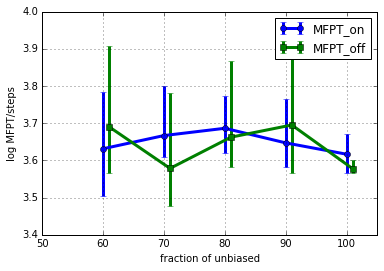

In [44]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#plt.plot(MM[:,0],MM[:,1],marker='.',linewidth=0,label='w/ replacem')

#f, ax = plt.subplots(1,2, sharey=True)


plt.errorbar(D.index,D.log_mfpt_on_all['mean'], 
             yerr=[D.log_mfpt_on_all['mean']-D.log_mfpt_on_all['p15'],
                   D.log_mfpt_on_all['p95']-D.log_mfpt_on_all['mean']],
             linewidth=3,label='MFPT_on',marker='o')


## plot the off times with a small offset
plt.errorbar(D.index+1,D.log_mfpt_off_all['mean'], 
             yerr=[D.log_mfpt_off_all['mean']-D.log_mfpt_off_all['p15'],
                   D.log_mfpt_off_all['p95']-D.log_mfpt_off_all['mean']],
             linewidth=3,label='MFPT_off',marker='s')


plt.xlim(50,105)
plt.legend()
plt.xlabel('fraction of unbiased')
plt.ylabel('log MFPT/steps')
plt.grid()
plt.savefig('values.pdf')

Stability of the mean first-passage times from any interface to bulk and from bulk to any interface for increasing fractions of the unbiased simulations used. Errorbars are 95% percentiles from 6 bootstrap samples for each fraction. Data for Inactive left-Left TRAM

In [43]:
#print only the frac20 probabilities
D2.xs('frac20',level=1,axis=1)

,log_mfpt_on_all,log_mfpt_off_all
fraction,,
60,1.0,1.0
70,1.0,1.0
80,1.0,1.0
90,1.0,1.0
100,1.0,1.0


Probablity $P(f)$ to find the best estimate of the MFPTs in the confidence intervals from bootstrap sampling. the CI were defined following Noe's definition (i.e. z% reduction or increase from best estimate of log time), but using a STRICTER value of z (20% vs 100% in Noe's TRAM paper). Probability of 1.0 indicates convergence.

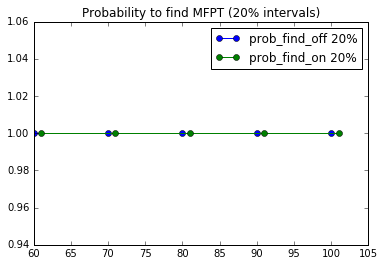

In [46]:
plt.plot(D2.index,D2.log_mfpt_on_all['frac20'],marker='o',label='prob_find_off 20%')
plt.plot(D2.index+1,D2.log_mfpt_off_all['frac20'],marker='o',label='prob_find_on 20%')
plt.title("Probability to find MFPT (20% intervals)")
plt.legend()
plt.savefig('probs.pdf')